<a href="https://colab.research.google.com/github/mirrorball108/EEG-analysis-of-Autism-patients/blob/main/autism_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_pre=pd.read_csv('/content/pre_treatement_combined.csv')
df_pre.head()

,FP2-F4,F4 -C4,C4 -P4,P4 -O2,FP1-F3,F3 -C3,C3 -P3,P3 -O1,FP2-F8,F8 -T4,T4 -T6,T6 -O2,FP1-F7,F7 -T3,T3 -T5,T5 -O1
0,-65,3,-16,20,5,-4,-65,84,26,-71,-7,-8,76,-40,-44,28
1,-108,41,-17,16,-28,183,-85,79,22,-86,5,-10,201,-12,-42,2
2,-177,102,-20,12,-84,481,-113,69,16,-111,25,-14,402,30,-41,-38
3,-270,177,-23,6,-157,849,-145,55,2,-144,51,-19,647,81,-40,-87
4,-383,260,-26,-1,-242,1250,-178,37,-21,-184,80,-26,911,137,-42,-140


In [ ]:
df_post=pd.read_csv('/content/post_treatment_combined.csv')
df_post=df_post.drop([0,1])
df_post.head()

,FP2-F4,F4 -C4,C4 -P4,P4 -O2,FP1-F3,F3 -C3,C3 -P3,P3 -O1,FP2-F8,F8 -T4,T4 -T6,T6 -O2,FP1-F7,F7 -T3,T3 -T5,T5 -O1
2,-74.0,4.0,-16.0,-53.0,1.0,-15.0,-22.0,-32.0,-24.0,-47.0,-56.0,-13.0,-8.0,-43.0,7.0,-24.0
3,-92.0,0.0,-14.0,-31.0,-28.0,-5.0,-20.0,-26.0,-47.0,-42.0,-57.0,9.0,-28.0,-46.0,12.0,-17.0
4,-126.0,-3.0,-12.0,-12.0,-61.0,5.0,-17.0,-21.0,-89.0,-32.0,-57.0,24.0,-52.0,-48.0,18.0,-12.0
5,-163.0,-5.0,-10.0,-5.0,-85.0,10.0,-13.0,-18.0,-136.0,-19.0,-55.0,28.0,-72.0,-47.0,22.0,-9.0
6,-188.0,-6.0,-9.0,-8.0,-91.0,10.0,-10.0,-18.0,-171.0,-8.0,-53.0,20.0,-82.0,-45.0,23.0,-7.0


In [ ]:
df_pre.shape

(7680, 16)

In [ ]:
df_post.shape

(7679, 16)

In [ ]:
#creating labels
pre=[1]*7680
post=[0]*7679

print(pre[0:5])
print(post[0:5])

labels=pre+post
print(len(labels))
type(labels)

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
15359


list

In [ ]:
df_combined = pd.concat([df_pre, df_post], ignore_index=True)

In [ ]:
df_combined.shape

(15359, 16)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_combined,labels,test_size=0.2,random_state=42)

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### SVM after scaling data

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Create and train the SVM model
model = SVC(kernel='linear')
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.583984375
[[ 737  813]
 [ 465 1057]]
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      1550
           1       0.57      0.69      0.62      1522

    accuracy                           0.58      3072
   macro avg       0.59      0.58      0.58      3072
weighted avg       0.59      0.58      0.58      3072



# Random Forest after scaling data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Make predictions
y_pred_rf_1 =rf.predict(x_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred_rf_1)
print(f"Accuracy Score: {accuracy2}")
print(confusion_matrix(y_test, y_pred_rf_1))
print(classification_report(y_test, y_pred_rf_1))

Accuracy Score: 0.9869791666666666
[[1520   30]
 [  10 1512]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1550
           1       0.98      0.99      0.99      1522

    accuracy                           0.99      3072
   macro avg       0.99      0.99      0.99      3072
weighted avg       0.99      0.99      0.99      3072



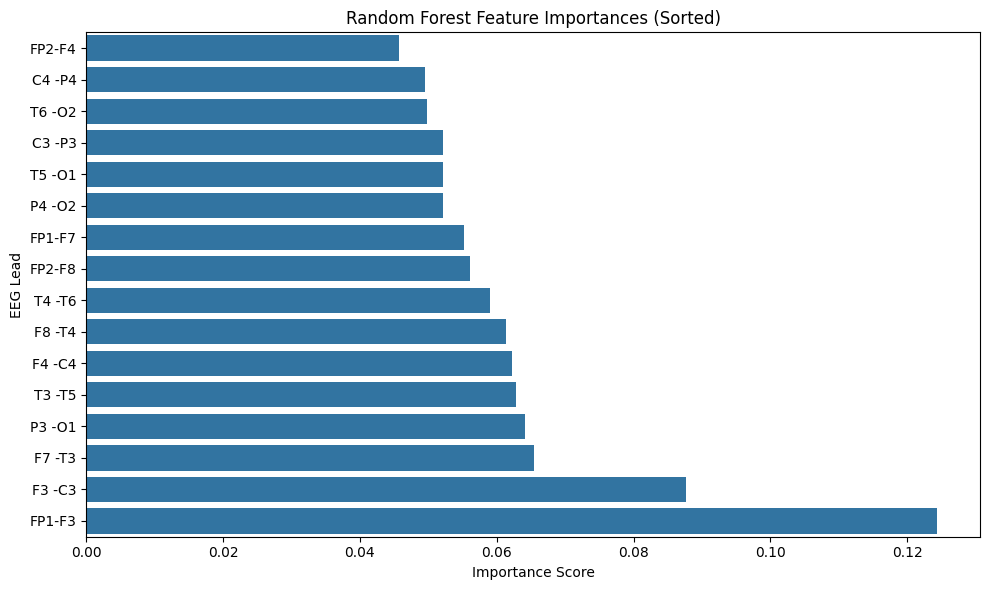

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances and feature names
importances = rf.feature_importances_
feature_names = df_combined.columns
# Sort the importances and corresponding feature names
sorted_idx = np.argsort(importances)  # ascending order
sorted_importances = importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title("Random Forest Feature Importances (Sorted)")
plt.xlabel("Importance Score")
plt.ylabel("EEG Lead")
plt.tight_layout()
plt.show()


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=1)


Epoch 1/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6206 - loss: 0.6381 - val_accuracy: 0.7893 - val_loss: 0.4609
Epoch 2/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8171 - loss: 0.3990 - val_accuracy: 0.8397 - val_loss: 0.3555
Epoch 3/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8637 - loss: 0.3039 - val_accuracy: 0.8519 - val_loss: 0.3197
Epoch 4/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8750 - loss: 0.2753 - val_accuracy: 0.8755 - val_loss: 0.2980
Epoch 5/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8960 - loss: 0.2400 - val_accuracy: 0.8690 - val_loss: 0.2989
Epoch 6/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8944 - loss: 0.2371 - val_accuracy: 0.8918 - val_loss: 0.2770
Epoch 7/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9088 - loss: 0.2199 - val_accuracy: 0.9007 - val_loss: 0.2635
Epoch 8/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9131 - loss: 0.2071 -

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9235 - loss: 0.1877

Test Accuracy: 0.9287


In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1550
           1       0.92      0.94      0.93      1522

    accuracy                           0.93      3072
   macro avg       0.93      0.93      0.93      3072
weighted avg       0.93      0.93      0.93      3072



# SVM on scaled data post PCA, n=8

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
pca_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8']
train_pca_df = pd.DataFrame(data=x_train_pca, columns=pca_columns)
test_pca_df = pd.DataFrame(data=x_test_pca, columns=pca_columns)

In [ ]:
# Explained Variance Ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.23602324 0.14825974 0.12496685 0.10351656 0.0843048  0.06712971
 0.05292614 0.04908064]


In [ ]:
# Create and train the SVM model
model2 = SVC(kernel='linear')
model2.fit(train_pca_df, y_train)

# Make predictions
y_pred_svm2 = model2.predict(test_pca_df)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred_svm2)
print(f"Accuracy Score: {accuracy3}")
print(confusion_matrix(y_test, y_pred_svm2))
print(classification_report(y_test, y_pred_svm2))

Accuracy Score: 0.5403645833333334
[[682 868]
 [544 978]]
              precision    recall  f1-score   support

           0       0.56      0.44      0.49      1550
           1       0.53      0.64      0.58      1522

    accuracy                           0.54      3072
   macro avg       0.54      0.54      0.54      3072
weighted avg       0.54      0.54      0.54      3072



In [ ]:
rf2= RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(train_pca_df, y_train)

# Make predictions
y_pred_rf2 =rf2.predict(test_pca_df)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred_rf2)
print(f"Accuracy Score: {accuracy4}")
print(confusion_matrix(y_test, y_pred_rf2))
print(classification_report(y_test, y_pred_rf2))

Accuracy Score: 0.9518229166666666
[[1471   79]
 [  69 1453]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1550
           1       0.95      0.95      0.95      1522

    accuracy                           0.95      3072
   macro avg       0.95      0.95      0.95      3072
weighted avg       0.95      0.95      0.95      3072



<Axes: >

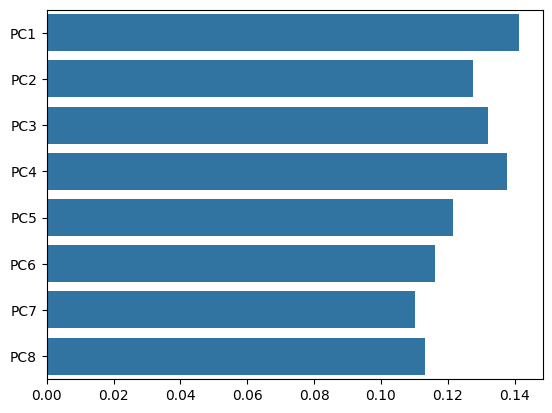

In [ ]:
importances = rf2.feature_importances_
sns.barplot(x=importances, y=pca_columns)

In [ ]:
nnmodel2 = Sequential()
nnmodel2.add(Dense(16, activation='relu', input_shape=(train_pca_df.shape[1],)))
nnmodel2.add(Dense(8, activation='relu'))
nnmodel2.add(Dense(1, activation='sigmoid'))
nnmodel2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
history = nnmodel2.fit(train_pca_df, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=1)

Epoch 1/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5710 - loss: 0.6833 - val_accuracy: 0.7022 - val_loss: 0.5754
Epoch 2/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7342 - loss: 0.5170 - val_accuracy: 0.7526 - val_loss: 0.4951
Epoch 3/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7683 - loss: 0.4547 - val_accuracy: 0.7445 - val_loss: 0.4778
Epoch 4/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7750 - loss: 0.4429 - val_accuracy: 0.7624 - val_loss: 0.4668
Epoch 5/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7987 - loss: 0.4147 - val_accuracy: 0.7803 - val_loss: 0.4505
Epoch 6/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7987 - loss: 0.4020 - val_accuracy: 0.7811 - val_loss: 0.4458
Epoch 7/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8058 - loss: 0.3984 - val_accuracy: 0.7925 - val_loss: 0.4344
Epoch 8/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8179 - loss: 0.3842 - 

In [ ]:
loss2, accuracy2 = nnmodel2.evaluate(test_pca_df, y_test)
print(f"\nTest Accuracy: {accuracy2:.4f}")
y_pred2nn = (nnmodel2.predict(test_pca_df) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred2nn))

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8468 - loss: 0.3217

Test Accuracy: 0.8477
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1550
           1       0.84      0.85      0.85      1522

    accuracy                           0.85      3072
   macro avg       0.85      0.85      0.85      3072
weighted avg       0.85      0.85      0.85      3072



# SVM using specific leads that are most likely to be affected by autism

In [ ]:
#list of leads used: FP2-F4, F4-C4, FP1-F3, F3-C3, F8-T4, T4-T6, F7-T3, T3-T5

In [ ]:
df_acc_leads=df_combined.drop(columns=['C4 -P4','P4 -O2','C3 -P3','P3 -O1','FP2-F8','T6 -O2','FP1-F7','T5 -O1'])

In [ ]:
x_train_leads,x_test_leads,y_train_leads,y_test_leads=train_test_split(df_acc_leads,labels,test_size=0.2,random_state=42)

In [ ]:
sc2=StandardScaler()
x_train_leads=sc2.fit_transform(x_train_leads)
x_test_leads=sc2.transform(x_test_leads)

In [ ]:
# Create and train the SVM model
model3 = SVC(kernel='linear')
model3.fit(x_train_leads, y_train_leads)

# Make predictions
y_pred5 = model3.predict(x_test_leads)

# Evaluate the model
accuracy5 = accuracy_score(y_test_leads, y_pred5)
print(f"Accuracy Score: {accuracy5}")
print(confusion_matrix(y_test_leads, y_pred5))
print(classification_report(y_test_leads, y_pred5))

Accuracy Score: 0.5882161458333334
[[ 748  802]
 [ 463 1059]]
              precision    recall  f1-score   support

           0       0.62      0.48      0.54      1550
           1       0.57      0.70      0.63      1522

    accuracy                           0.59      3072
   macro avg       0.59      0.59      0.58      3072
weighted avg       0.59      0.59      0.58      3072



In [ ]:
rf3= RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(x_train_leads, y_train_leads)

# Make predictions
y_pred_rf3 =rf3.predict(x_test_leads)

# Evaluate the model
accuracy6 = accuracy_score(y_test_leads, y_pred_rf3)
print(f"Accuracy Score: {accuracy6}")
print(confusion_matrix(y_test_leads, y_pred_rf3))
print(classification_report(y_test_leads, y_pred_rf3))

Accuracy Score: 0.9606119791666666
[[1477   73]
 [  48 1474]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1550
           1       0.95      0.97      0.96      1522

    accuracy                           0.96      3072
   macro avg       0.96      0.96      0.96      3072
weighted avg       0.96      0.96      0.96      3072



In [ ]:
df_acc_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15359 entries, 0 to 15358
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FP2-F4  15359 non-null  float64
 1   F4 -C4  15359 non-null  float64
 2   FP1-F3  15359 non-null  float64
 3   F3 -C3  15359 non-null  float64
 4   F8 -T4  15359 non-null  float64
 5   T4 -T6  15359 non-null  float64
 6   F7 -T3  15359 non-null  float64
 7   T3 -T5  15359 non-null  float64
dtypes: float64(8)
memory usage: 960.1 KB


In [ ]:
cols=['FP2-F4','F4 -C4','FP1-F3','F3 -C3','F8 -T4','T4 -T6','F7 -T3','T3 -T5' ]

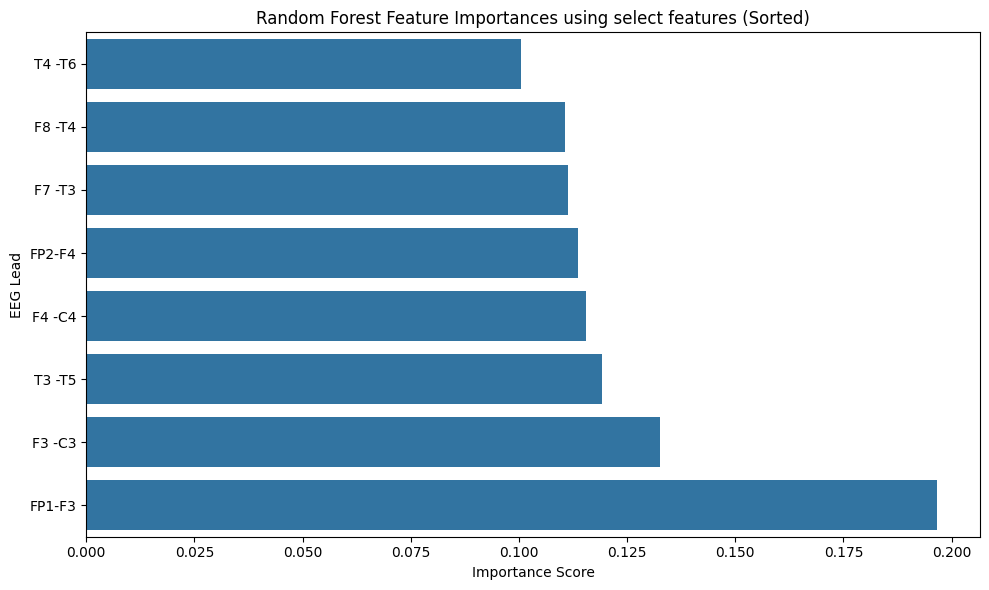

In [ ]:
# Get feature importances and feature names
importances = rf3.feature_importances_
feature_names = df_acc_leads.columns
# Sort the importances and corresponding feature names
sorted_idx = np.argsort(importances)  # ascending order
sorted_importances = importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title("Random Forest Feature Importances using select features (Sorted)")
plt.xlabel("Importance Score")
plt.ylabel("EEG Lead")
plt.tight_layout()
plt.show()

In [ ]:
nnmodel3 = Sequential()
nnmodel3.add(Dense(16, activation='relu', input_shape=(x_train_leads.shape[1],)))
nnmodel3.add(Dense(8, activation='relu'))
nnmodel3.add(Dense(1, activation='sigmoid'))
nnmodel3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
y_train_leads = np.array(y_train_leads)
y_test_leads = np.array(y_test_leads)

In [ ]:
history = nnmodel3.fit(x_train_leads, y_train_leads, epochs=50, batch_size=8, validation_split=0.1, verbose=1)

Epoch 1/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5967 - loss: 0.6516 - val_accuracy: 0.7071 - val_loss: 0.5416
Epoch 2/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7566 - loss: 0.4817 - val_accuracy: 0.7811 - val_loss: 0.4578
Epoch 3/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8071 - loss: 0.4000 - val_accuracy: 0.7950 - val_loss: 0.4354
Epoch 4/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8162 - loss: 0.3915 - val_accuracy: 0.7998 - val_loss: 0.4315
Epoch 5/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8275 - loss: 0.3664 - val_accuracy: 0.8031 - val_loss: 0.4300
Epoch 6/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8378 - loss: 0.3497 - val_accuracy: 0.8088 - val_loss: 0.4221
Epoch 7/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8407 - loss: 0.3475 - val_accuracy: 0.8096 - val_loss: 0.4163
Epoch 8/50
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8392 - loss: 0.3436 - 

In [ ]:
#most influential in random forest(top 8) when all leads combined= FP1-F3, F3-C3, F7-T3, P3-O1, T3-T5, F4-C4, F8-T4, T4-T6
#discrepancy: P3- 01(which is the top 8 in importance while taking all 14 leads into consideration ) , FP2- F4(which is supposed to be scientifically evident, but is last in the importance list while  considering 14 leads)

In [ ]:
loss3, accuracy3 = nnmodel3.evaluate(x_test_leads, y_test_leads)
print(f"\nTest Accuracy: {accuracy3:.4f}")
y_pred3 = (nnmodel3.predict(x_test_leads) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test_leads, y_pred3))

96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8505 - loss: 0.3146

Test Accuracy: 0.8548
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1550
           1       0.84      0.87      0.86      1522

    accuracy                           0.85      3072
   macro avg       0.86      0.85      0.85      3072
weighted avg       0.86      0.85      0.85      3072



**Results at the end of day 3:**

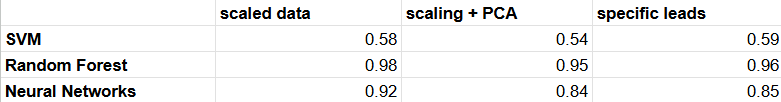